In [ ]:
!wget https://github.com/gbiamgaurav/datasets/raw/main/dataset.zip

--2023-07-14 12:59:46--  https://github.com/gbiamgaurav/datasets/raw/main/dataset.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/gbiamgaurav/datasets/main/dataset.zip [following]
--2023-07-14 12:59:46--  https://media.githubusercontent.com/media/gbiamgaurav/datasets/main/dataset.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2306205 (2.2M) [application/zip]
Saving to: ‘dataset.zip.1’

dataset.zip.1       100%[===================>]   2.20M  --.-KB/s    in 0.07s   

2023-07-14 12:59:46 (30.2 MB/s) - ‘dataset.zip.1’ saved [2306205/2306205]



In [ ]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
replace imbalanced_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: imbalanced_data.csv     
  inflating: labeled_data.csv        


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
imbalanced_data = pd.read_csv("/content/imbalanced_data.csv")
labelled_data = pd.read_csv("/content/labeled_data.csv")

In [ ]:
imbalanced_data.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [ ]:
labelled_data.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [ ]:
imbalanced_data["label"].value_counts()


0    29720
1     2242
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

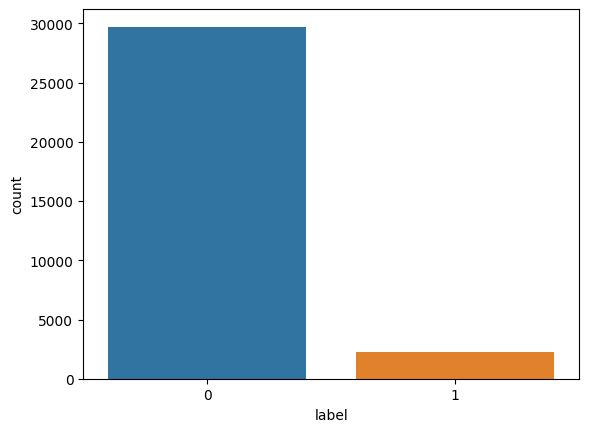

In [ ]:
sns.countplot(x="label", data=imbalanced_data)

In [ ]:
imbalanced_data.shape

(31962, 3)

In [ ]:
## check missing values

imbalanced_data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
## Drop 'id' column

imbalanced_data.drop(columns=["id"], axis=1, inplace=True)

In [ ]:
labelled_data.shape

(24783, 7)

In [ ]:
labelled_data.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [ ]:
labelled_data.drop(columns=['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'], axis=1, inplace=True)

In [ ]:
labelled_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
imbalanced_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
labelled_data["class"].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [ ]:
imbalanced_data["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
# replace the value of 0 to 1

labelled_data["class"].replace({0:1},inplace=True)

In [ ]:
labelled_data["class"].unique()

array([2, 1])

In [ ]:
# Let's replace the value of 2 to 0.

labelled_data["class"].replace({2:0}, inplace = True)

<Axes: xlabel='class', ylabel='count'>

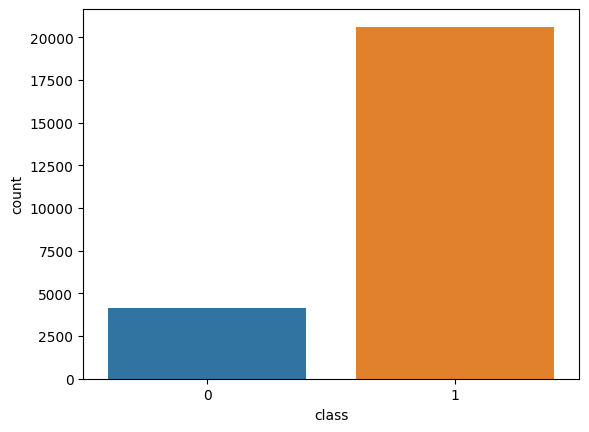

In [ ]:
sns.countplot(x="class", data=labelled_data)

In [ ]:
# Let's change the name of the 'class' to label

labelled_data.rename(columns={'class':'label'},inplace =True)

In [ ]:
labelled_data.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
imbalanced_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
## Let's concatinate both the data into a single data frame.

frame = [imbalanced_data, labelled_data]
df = pd.concat(frame)

In [ ]:
df.shape

(56745, 2)

In [ ]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


<Axes: xlabel='label', ylabel='count'>

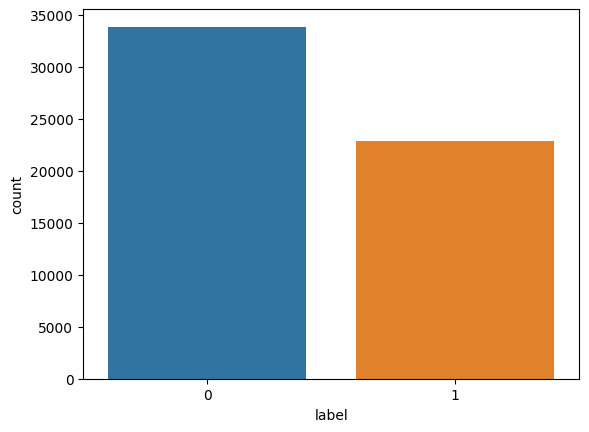

In [ ]:
sns.countplot(x='label',data=df)

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.utils import pad_sequences
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import tensorflow as tf
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 255)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Let's apply stemming and stopwords on the data

stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [ ]:
# Let's apply regex and do cleaning.

def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('\[.*?\]', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)

    return words

In [ ]:
# let's apply the data_cleaning on the data.

df['tweet']=df['tweet'].apply(data_cleaning)

In [ ]:
df["tweet"][2]

2                                                                                                                                                       bihday your majesti   bihday your majesti   bihday your majesti   bihday your majesti   bihday your majesti
2     rt urkindofbrand dawg rt  you ever fuck a bitch and she start to cry you be confused as shit  rt urkindofbrand dawg rt  you ever fuck a bitch and she start to cry you be confused as shit  rt urkindofbrand dawg rt  you ever fuck a bitch and she start ...
Name: tweet, dtype: object

In [ ]:
## Divide the data into X and y

X = df['tweet']
y = df['label']

In [ ]:
## Let's split the data into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42)
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

42558 42558
14187 14187


In [ ]:
max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [ ]:
## Creating model architecture.

model = Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5,080,501
Trainable params: 5,080,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Define early stopping

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,)

In [ ]:
# starting model training
history = model.fit(sequences_matrix,y_train,batch_size=1024, epochs = 25,
                   validation_split=0.2,callbacks=early_stopping)

34/34 [==============================] - 321s 9s/step - loss: 0.2021 - accuracy: 0.9337 - val_loss: 0.2230 - val_accuracy: 0.9324


In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)

444/444 [==============================] - 47s 107ms/step - loss: 0.2240 - accuracy: 0.9254


In [ ]:
lstm_prediction = model.predict(test_sequences_matrix)

444/444 [==============================] - 49s 109ms/step


In [ ]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

In [ ]:
print(confusion_matrix(y_test,res))

[[7896  557]
 [ 502 5232]]


In [ ]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Let's save the mdoel.
model.save("model.h5")

In [ ]:
import keras

In [ ]:
load_model=keras.models.load_model("model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [ ]:
# Let's test our model on custom data.
test = 'humans are idiots'
def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
test=[clean_text(test)]
print(test)
seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)
pred = load_model.predict(padded)
print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")

humans are idiots
humans are idiots
['human idiot']
[[939, 1600]]
1/1 [==============================] - 0s 324ms/step
pred [[0.4130651]]
no hate
